# Chapter 1

This is a notebook that explores the concepts from Chapter 1 of [Essential Math for Data Science](https://www.oreilly.com/library/view/essential-math-for/9781098102920/). This chapter focuses on the basic math and calculus concepts that are used in data science.

## Basic Math Manipulations

### A math function is analogous to a programming method

$f(x) = 2\pi x$


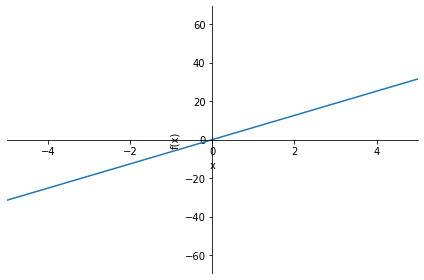

In [10]:
from sympy import plot, Symbol
from math import pi

def f(x):
    return 2 * pi * x

# using Sympy to plot the function
x = Symbol('x')
f = 2 * pi * x

#plot the function

plot(f, xlim=(-5,5))

print() # suppress extraneous output from plot.


### Multivariable Functions with SymPy


$f(x,y) = x * y^2$

## Performing a sum

$\sum \limits_{n=1}^{5} 2x^{2} = 2(1)^{2} + 2(2)^{2} + 2(3)^{2} + 2(4)^{2} + 2(5)^{2}$

In [11]:
summation = sum (2*(x**2) for x in range(1,5))
print (summation)

60


### Summing a set with basic Python

$X = [1, 3, 6, 10]$

$\sum \limits_{x \in X} 2x $

In [12]:
x = [1, 3, 6, 10]
n = len(x)
summation = sum (2*x[i] for i in range(0, n))
print(summation)

40


## Simplifying Expressions with SymPy
Show that 

$x^{5} / x^{3} = x^{2}$


In [13]:
from sympy import simplify

x = symbols('x')
expression = x**5/x**3
print(simplify(expression))

x**2


## Logarithms

$\log_{2}256 = 8$

8.0
Log 2 chart


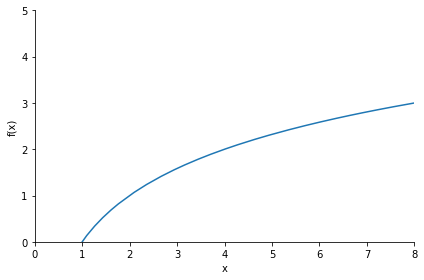

In [14]:
from math import log as plog
from sympy import log as slog
from sympy import Symbol
print(plog(256,2))

print ("Log 2 chart")
x = Symbol('x')
f = slog(x, 2)
p = plot(f, xlim=(0, 8), ylim=(0,5))



## Calculating Interest (not interesting)

Normally compounded interest is calculated as follows:

$A = P * (1 + \frac{r}{n})^{nt} $

- r - interest rate
- t - number of years
- n - number of times the interest is compounded per year (e.g., 12 = monthly, 4 = quarterly, etc.)
- A - future value of the investment
- P - initial value of the investment
 
Using Euler's number:

$ A = P * e^{rt} $


In [112]:
from math import exp
p = 999000 # principal
r = .0546 # rate of interest
n = 12 # number of payments per year
t = 30 # number of years
a = p * (1 + (r/n))**(n*t) # compound interest formula
a = round (a, 2)
print ("Using monthly compounding")
print ("\tAmount at term:{:,.2f}".format(a))
print ("\tInterest earned:{:,.2f}".format(a - p))

ae = p * exp(r*t) # compound interest formula. exp is the exponential function using Euler's number e
ae = round (ae, 2)
print ("Using Euler's number to continuously calculate interest:")
print ("\tAmount at term:{:,.2f}".format(ae))
print ("\tInterest earned:{:,.2f}".format(ae - p))
print ("\tDifference between continuous and monthly (Euler):{:,.2f}".format(round(ae-a,2)))


Using monthly compounding
	Amount at term:5,120,665.01
	Interest earned:4,121,665.01
Using Euler's number to continuously calculate interest:
	Amount at term:5,139,724.61
	Interest earned:4,140,724.61
	Difference between continuous and monthly (Euler):19,059.60


# Limits

$f(x) = \frac{1}{x}$

$\displaystyle{\lim _{x \to \infty}} f(x) = 0$

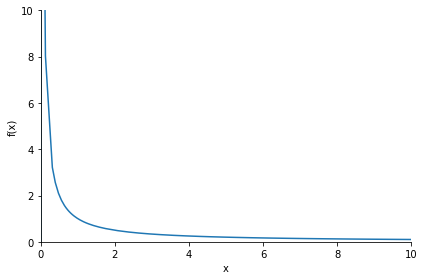

The result of f(x)= 1/x approaches 0 as x approaches infinity.
Now calculate Euler's number:
The result of f(n)= (1+(1/n))**n approaches 2.71828182845905 as n approaches infinity.


In [16]:
from sympy import *

x = Symbol('x')
f = 1/x
plot(f, xlim = (0, 10), ylim = (0,10))

result = limit(f, x, oo)
print ("The result of f(x)= 1/x approaches %s as x approaches infinity."% result)

print ("Now calculate Euler's number:")
n = Symbol('n')
f = (1+(1/n))**n
result = limit(f, n, oo)
print ("The result of f(n)= (1+(1/n))**n approaches %s as n approaches infinity."% result.evalf())
# needed the .evalf() because SymPy knows that's Euler's number!


## Derivatives

Find slope of a plot as a point using the "rise over run" formula:

$m = \frac{y_{2}-y_{1}}{x_{2}-x_{1}}$

Test this by passing the function for the area of a circle to the rise over run formula and see how close we get to the perimeter formula. The area of a circle is:

$A = \pi r^{2}$

The perimeter of a circle is:

$P = 2 \pi r$

That's the derivative of the area formula.

In [15]:
from math import pi

def derivative_using_rise_of_slope(f, x, step_size):
    m = ((f(x+step_size)) - f(x)) / ((x + step_size) - x)
    return m

def circle_area(r):
    return pi * (r ** 2)


step = .0000000000001
perimeter_of_circle_4 = derivative_using_rise_of_slope(circle_area, 4, step)
# we need to use a very small step size to get a good approximation

print ("The derivative of the area of a circle with radius 4 using rise of run is %s when we use a step of %s"%(perimeter_of_circle_4, step))

correct_radius = (2 * pi * 4)
print ("The perimeter using the perimeter formula with radius 4 is %s"% correct_radius)
print ("The difference between the two is %s"% (perimeter_of_circle_4 - correct_radius))

The derivative of the area of a circle with radius 4 using rise of run is 25.13274336283186 when we use a step of 1e-13
The perimeter using the perimeter formula with radius 4 is 25.132741228718345
The difference between the two is 2.134113515239733e-06


### Good news everyone! We don't have to remember all those derivative rules, SymPy can do it for us.

So why did I sit through calculus?

In [43]:
from sympy import symbols, diff
import math
r, pi = symbols('r, pi')

f=(r**2)*pi

dx_f = diff(f, r)
print ("%s differentiates to %s" %(f, dx_f))
perimeter = dx_f.subs([(r, 4), (pi, math.pi)])

print ("The perimeter of a circle with radius 4 is %s."% perimeter)

pi*r**2 differentiates to 2*pi*r
The perimeter of a circle with radius 4 is 25.1327412287183.


### And Partial Derivatives

$f(x,y) = \frac{2x^3}{y^\frac{23}{100}}$

2*x**3 + y**0.23 x differentiates to 6*x**2
2*x**3 + y**0.23 y differentiates to 0.23/y**0.77


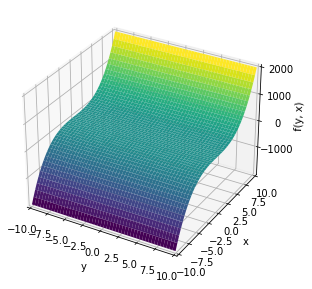

17.1728349492319


In [93]:
from sympy import symbols, diff
from sympy.plotting import plot3d

x,y = symbols('x y')

f = (2*x**3) + (y**(23/100))

dx_f = diff(f, x)
dy_f = diff(f, y)

print ("%s x differentiates to %s" %(f, dx_f))
print ("%s y differentiates to %s" %(f, dy_f))
p = plot3d(f)
print (f.subs([(x,2),(y,2)]))


#### Using Limits to find the derivative

Find the derivative of:

$f(x) = 4x^{3}$

In [104]:
from sympy import symbols, limit

x,s = symbols('x s')

f = 4*x**3

# back to the rise of run formula
slope_f = (f.subs(x, x+s) - f) / ((x+s)  - x)

# use the limit to get the slope as s approaches 0
result = limit(slope_f, s, 0)
print ("The slope of %s as s approaches 0 is %s"%(f, result))

final_result = result.subs(x, 14)
print ("The final result of the slope of %s as s approaches 0 with a value of x = %s is %s"%(f, 14, final_result))

The slope of 4*x**3 as s approaches 0 is 12*x**2
The final result of the slope of 4*x**3 as s approaches 0 with a value of x = 14 is 2352


# Chain Rule

Given:

$y = x^{2}$

and

$z = 4(y-3)^{4}$

What is the derivative of $z$ with respect to $x$ i.e. what is $\frac{dz}{dx}$?

We know we can substitute the function for $y$ and get:

$z = 4(x^{2}-3)^{4}$



In [118]:
from sympy import diff

# manual subsitution
_z = 4*(x**2 - 3)**4
_dz_dx = diff(_z, x)
print ("%s differentiates to %s" %(_z, _dz_dx))

# first function
_y = x**2

# derivative of first function
dy_dx = diff(_y)

# second function
z = 4 *(y-3) **4

# derivative of second function
dz_dy = diff(z)

 # calculate derivative wout chain rule
dz_dx_without_chain = diff(z.subs(y, _y))

# calculate derivative with chain rule
dz_dx_with_chain = (dy_dx * dz_dy).subs(y, _y)

print ("With chain rule %s" %dz_dx_with_chain)
print ("Without chain rule %s" % dz_dx_without_chain)


4*(x**2 - 3)**4 differentiates to 32*x*(x**2 - 3)**3
With chain rule 32*x*(x**2 - 3)**3
Without chain rule 32*x*(x**2 - 3)**3


   Copyright 2022 James M. Leonardo

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0